In [1]:
import numpy as np
import pandas as pan
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

In [2]:
heartData=pan.read_csv('heart.csv')
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
print(heartData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [5]:
heartData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

EXPLORATORY DATA ANALYSIS

<Axes: >

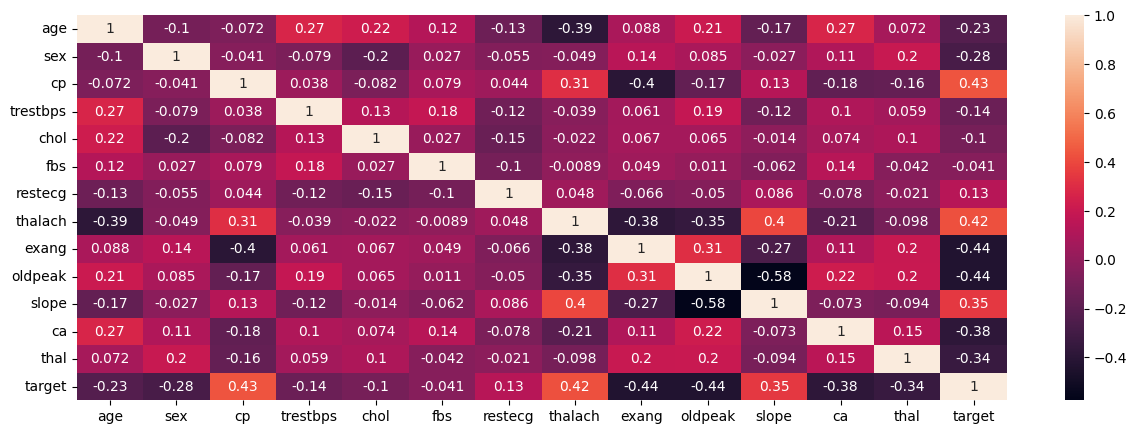

In [6]:
plt.figure(figsize= (15,5))
correlation = heartData.corr()
sns.heatmap(correlation,annot=True)

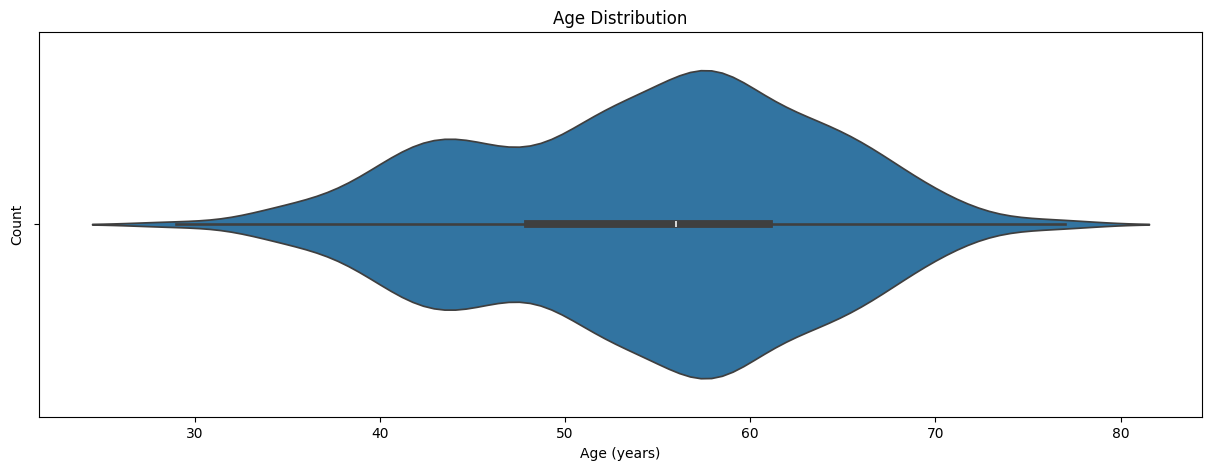

In [7]:
plt.figure(figsize=(15,5))
plt.title('Age Distribution')
sns.violinplot(x=heartData['age'])
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

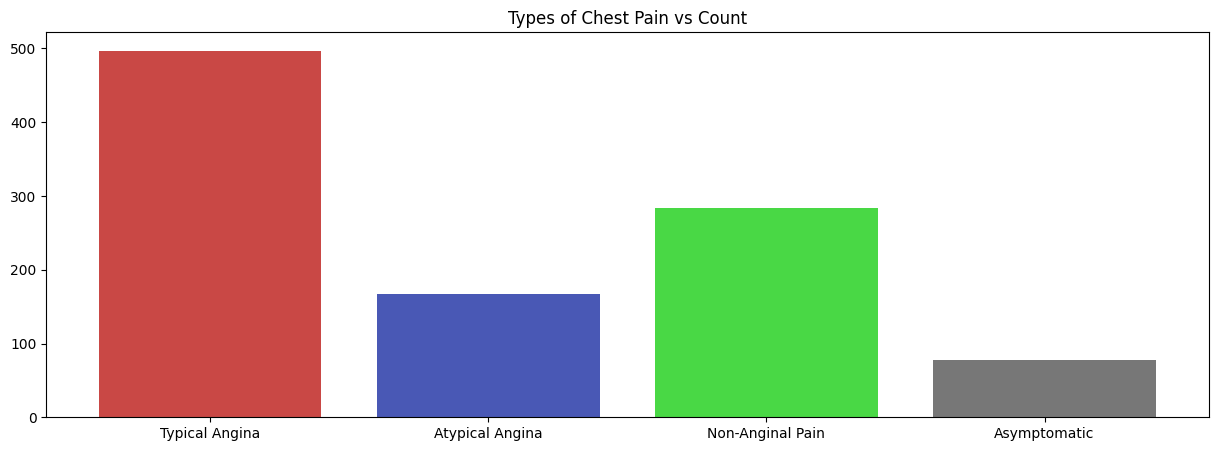

In [8]:
painValues = heartData['cp'].value_counts()
pain_dict={"Typical Angina": painValues[0], "Atypical Angina": painValues[1],"Non-Anginal Pain": painValues[2],"Asymptomatic": painValues[3]}
names=list(pain_dict.keys())
values=list(pain_dict.values())

plt.figure(figsize=(15,5))
plt.title('Types of Chest Pain vs Count')
plt.bar(range(len(pain_dict)), values, tick_label=names, color=['#C94845', '#4958B5', '#49D845', '#777777'])
plt.show()

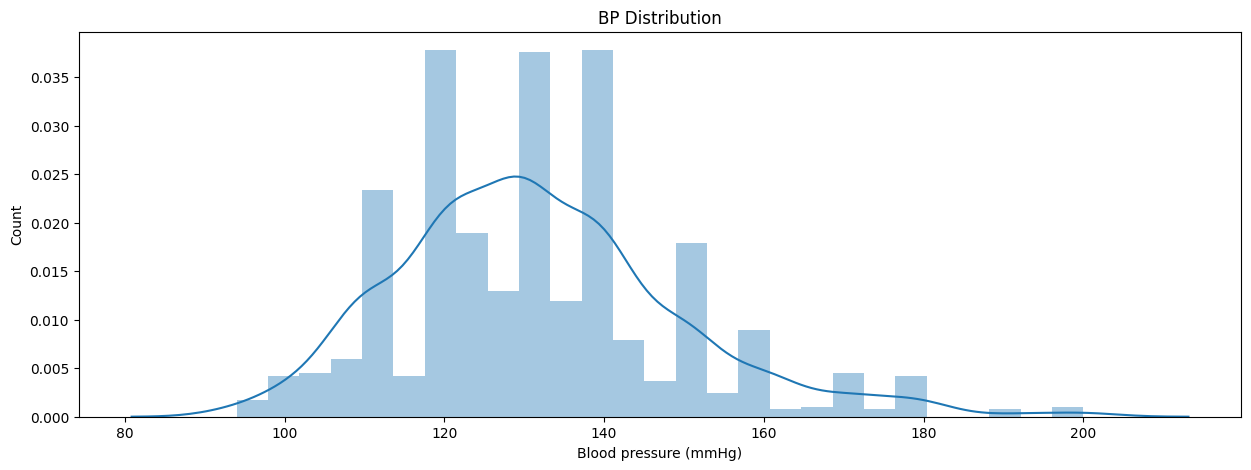

In [27]:
plt.figure(figsize=(15,5))
plt.title('BP Distribution')
sns.distplot(x=heartData['trestbps'])
plt.xlabel('Blood pressure (mmHg)')
plt.ylabel('Count')
plt.show()

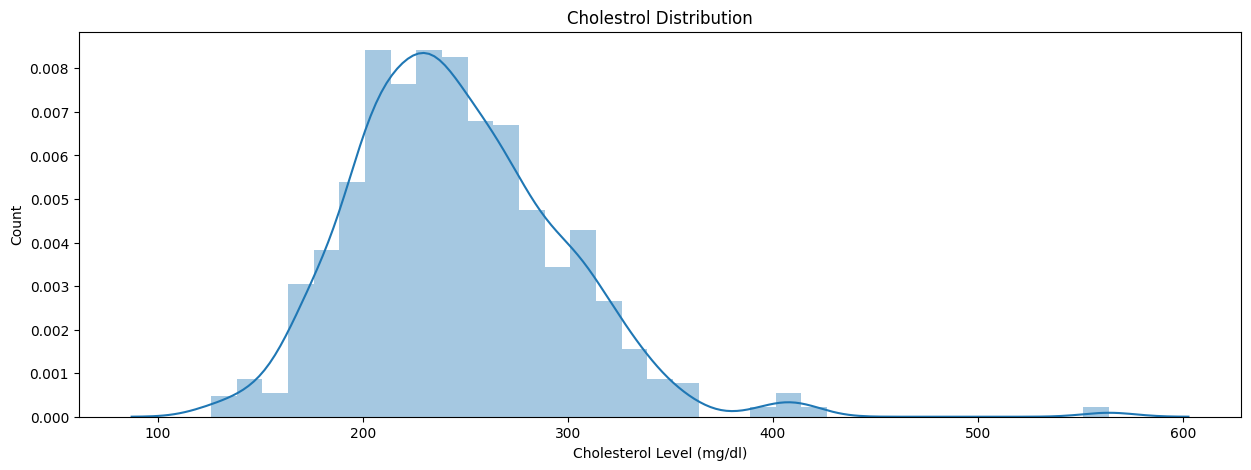

In [28]:
plt.figure(figsize=(15,5))
plt.title("Cholestrol Distribution")
sns.distplot(x=heartData['chol'])
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Count')
plt.show()

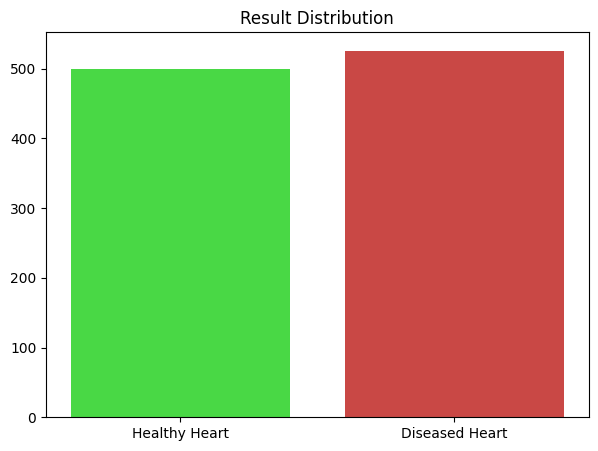

In [29]:
result = heartData['target'].value_counts()
result_dict={"Healthy Heart": result[0], "Diseased Heart": result[1]}
names=list(result_dict.keys())
values=list(result_dict.values())

plt.figure(figsize=(7,5))
plt.title('Result Distribution')
plt.bar(range(len(result_dict)), values, tick_label=names, color=['#49D845', '#C94845'])
plt.show()

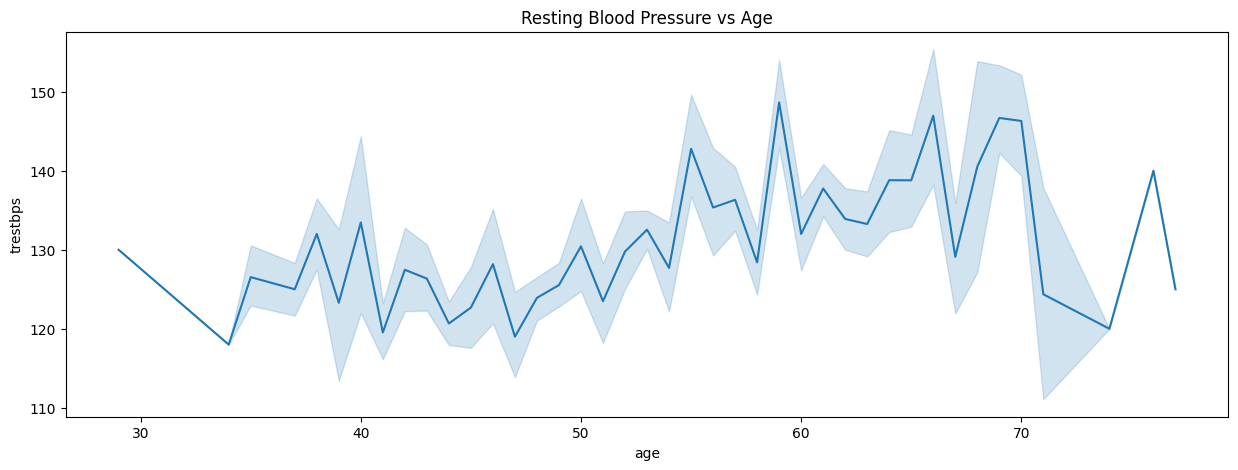

In [30]:
plt.figure(figsize=(15,5))
plt.title("Resting Blood Pressure vs Age")
sns.lineplot(x="age", y="trestbps", data=heartData)
plt.show()

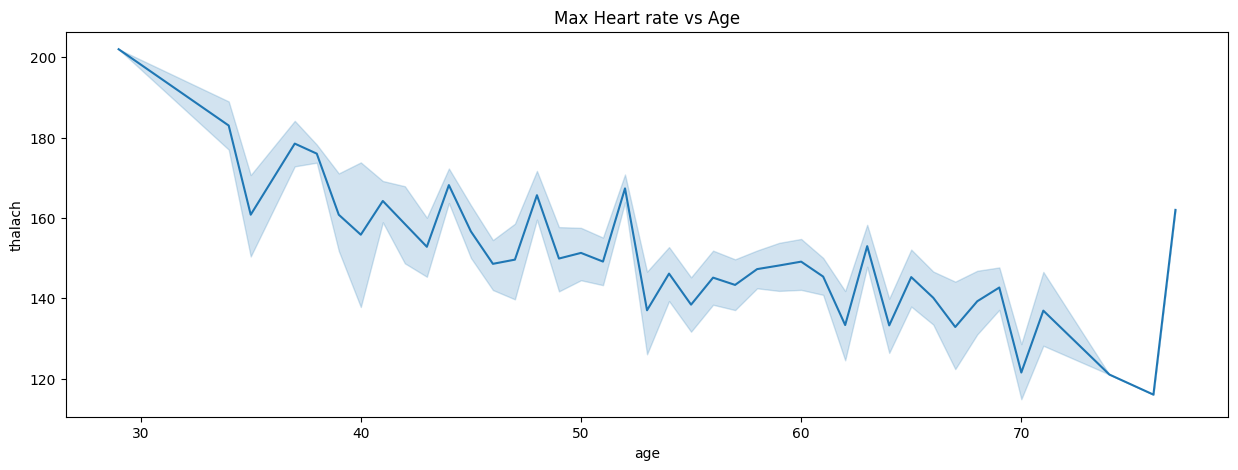

In [31]:
plt.figure(figsize=(15,5))
plt.title("Max Heart rate vs Age")
sns.lineplot(x="age", y="thalach", data=heartData)
plt.show()

TRAIN TEST SPLIT

In [32]:
X=heartData.drop(columns='target',axis=1)
Y=heartData['target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=4)

In [43]:
accuracy={}
recall={}
f_score={}

USING LOGISTIC REGRESSION

In [44]:
from sklearn.linear_model import LogisticRegression

logic=LogisticRegression()
logic.fit(x_train, y_train)
x_train_logic = logic.predict(x_train)
x_test_logic = logic.predict(x_test)

training_acc_logic = accuracy_score(x_train_logic, y_train)
testing_acc_logic = accuracy_score(x_test_logic, y_test)
print("Accuracy on Training Data: %.2f"%(training_acc_logic*100))
print("Accuracy on Testing Data: %.2f"%(testing_acc_logic*100))

precision_logic=precision_score(y_test,x_test_logic)
print("\nPrecision is %.2f"%(precision_logic*100))

print("\nConfusion Matrix: ")
cm_logic=confusion_matrix(y_test,x_test_logic)
print(cm_logic)
tp_l=cm_logic[1,1]
fp_l=cm_logic[0,1]
fn_l=cm_logic[1,0]
tn_l=cm_logic[0,0]

r_l=(tp_l/(tp_l+fn_l))
print("Recall: %.3f"%r_l)

f_l=(2*precision_logic*r_l)/(precision_logic+r_l)
print("F Score: %.3f"%f_l)

accuracy["Logistic"]=training_acc_logic
recall["Logistic"]=r_l
f_score["Logistic"]=f_l

Accuracy on Training Data: 85.73
Accuracy on Testing Data: 82.93

Precision is 80.17

Confusion Matrix: 
[[77 23]
 [12 93]]
Recall: 0.886
F Score: 0.842


USING RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier

randomForest=RandomForestClassifier(random_state=3, max_features=0.1, min_samples_leaf=5, min_samples_split=8,n_estimators=40)
randomForest.fit(x_train,y_train)
x_train_rf=randomForest.predict(x_train)
x_test_rf=randomForest.predict(x_test)

training_acc_rf = accuracy_score(x_train_rf, y_train)
testing_acc_rf = accuracy_score(x_test_rf, y_test)
print("Accuracy on Training Data: %.2f"%(training_acc_rf*100))
print("Accuracy on Testing Data: %.2f"%(testing_acc_rf*100))

precision_rf=precision_score(y_test,x_test_rf)
print("\nPrecision is %.2f"%(precision_rf*100))

print("\nConfusion Matrix: ")
cm_rf=confusion_matrix(y_test,x_test_rf)
print(cm_rf)
tp_rf=cm_rf[1,1]
fp_rf=cm_rf[0,1]
fn_rf=cm_rf[1,0]
tn_rf=cm_rf[0,0]

r_rf=(tp_rf/(tp_rf+fn_rf))
print("\nRecall: %.3f"%r_rf)

f_rf=(2*precision_rf*r_rf)/(precision_rf+r_rf)
print("\nF Score: %.3f"%f_rf)

accuracy["RandomForest"]=training_acc_rf
recall["RandomForest"]=r_rf
f_score["RandomForest"]=f_rf

Accuracy on Training Data: 95.49
Accuracy on Testing Data: 90.73

Precision is 89.81

Confusion Matrix: 
[[89 11]
 [ 8 97]]

Recall: 0.924

F Score: 0.911


USING KNN ALGORITHM

In [46]:
from sklearn.neighbors import KNeighborsClassifier

k_nearest=KNeighborsClassifier()
k_nearest.fit(x_train, y_train)
x_train_knn=k_nearest.predict(x_train)
x_test_knn=k_nearest.predict(x_test)

training_acc_knn=accuracy_score(x_train_knn,y_train)
testing_acc_knn=accuracy_score(x_test_knn,y_test)
print("Accuracy on Training Data: %.2f"%(training_acc_knn*100))
print("Accuracy on Testing Data: %.2f"%(testing_acc_knn*100))

precision_knn=precision_score(y_test,x_test_rf)
print("\nPrecision is %.2f"%(precision_knn*100))

print("\nConfusion Matrix: ")
cm_knn=confusion_matrix(y_test,x_test_knn)
print(cm_knn)
tp_knn=cm_knn[1,1]
fp_knn=cm_knn[0,1]
fn_knn=cm_knn[1,0]
tn_knn=cm_knn[0,0]

r_k=(tp_knn/(tp_knn+fn_knn))
print("\nRecall: %.3f"%r_k)

f_k=(2*precision_knn*r_k)/(precision_knn+r_k)
print("\nF Score: %.3f"%f_k)

accuracy["KNN"]=training_acc_knn
recall["KNN"]=r_k
f_score["KNN"]=f_k

Accuracy on Training Data: 91.95
Accuracy on Testing Data: 75.12

Precision is 89.81

Confusion Matrix: 
[[75 25]
 [26 79]]

Recall: 0.752

F Score: 0.819


USING SUPPORT VECTOR MACHINES

In [47]:
from sklearn.svm import SVC

support_vector=SVC()
support_vector.fit(x_train, y_train)
x_train_svm=support_vector.predict(x_train)
x_test_svm=support_vector.predict(x_test)

training_acc_svm=accuracy_score(x_train_svm,y_train)
testing_acc_svm=accuracy_score(x_test_svm,y_test)
print("Accuracy on Training Data: %.2f"%(training_acc_svm*100))
print("Accuracy on Testing Data: %.2f"%(testing_acc_svm*100))

precision_svm=precision_score(y_test,x_test_svm)
print("\nPrecision is %.2f"%(precision_svm*100))

print("\nConfusion Matrix: ")
cm_svm=confusion_matrix(y_test,x_test_svm)
print(cm_svm)
tp_svm=cm_svm[1,1]
fp_svm=cm_svm[0,1]
fn_svm=cm_svm[1,0]
tn_svm=cm_svm[0,0]

r_s=(tp_l/(tp_l+fn_l))
print("\nRecall: %.3f"%r_s)

f_s=(2*precision_svm*r_s)/(precision_svm+r_s)
print("\nF Score: %.3f"%f_s)

accuracy["SVM"]=training_acc_svm
recall["SVM"]=r_s
f_score["SVM"]=f_s

Accuracy on Training Data: 70.61
Accuracy on Testing Data: 71.22

Precision is 68.85

Confusion Matrix: 
[[62 38]
 [21 84]]

Recall: 0.886

F Score: 0.775


PERFORMANCE COMPARISON


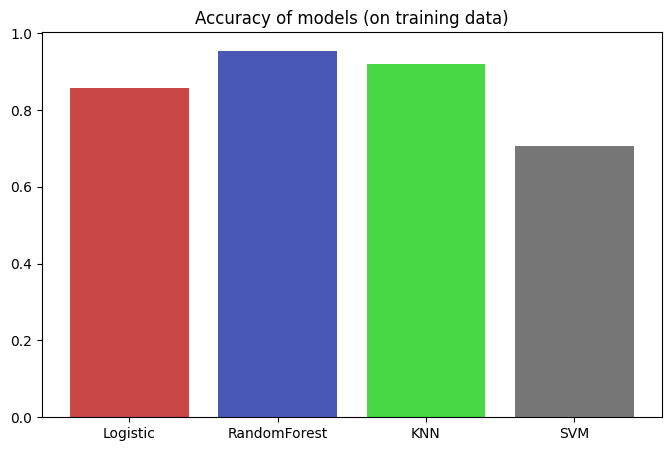

In [48]:
names=list(accuracy.keys())
values=list(accuracy.values())

plt.figure(figsize=(8,5))
plt.bar(range(len(accuracy)), values, tick_label=names, color=['#C94845', '#4958B5', '#49D845', '#777777'])
plt.title('Accuracy of models (on training data)')
plt.show()

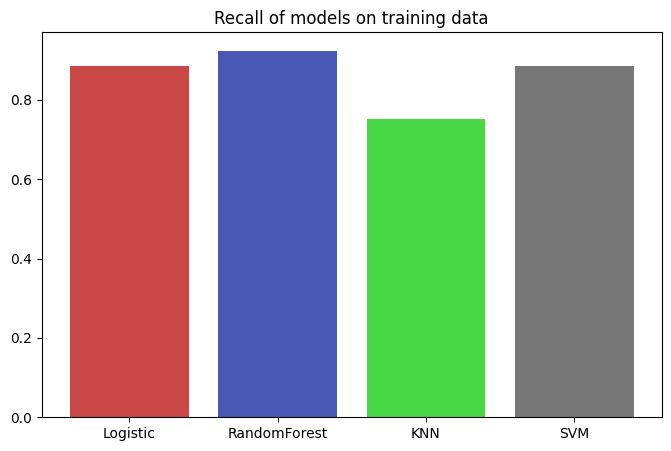

In [49]:
names=list(recall.keys())
values=list(recall.values())

plt.figure(figsize=(8,5))
plt.bar(range(len(recall)), values, tick_label=names, color=['#C94845', '#4958B5', '#49D845', '#777777'])
plt.title('Recall of models on training data')
plt.show()

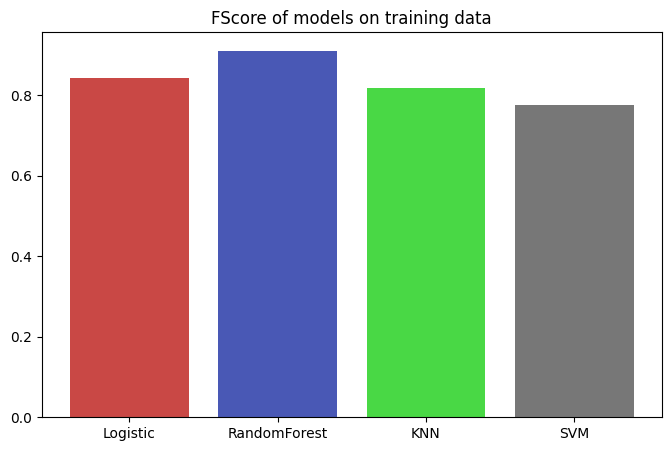

In [50]:
names=list(f_score.keys())
values=list(f_score.values())

plt.figure(figsize=(8,5))
plt.bar(range(len(f_score)), values, tick_label=names, color=['#C94845', '#4958B5', '#49D845', '#777777'])
plt.title('FScore of models on training data')
plt.show()

In [51]:
input_data=input("Enter the reading values : ")

inTuple=tuple(map(float, input_data.split(',')))
input_data_as_numpy_array = np.asarray(inTuple)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = randomForest.predict(input_data_reshape)

print("\n----------------------------------------------------------")
print("For the given readings: %s"%input_data)
print("----------------------------------------------------------")
print("==========================================================")
if(prediction[0]==0):
  print("The Patient has a HEALTHY HEART.")
else:
  print("The Patient's heart is PRONE TO A DISEASE!!!")
print("==========================================================")


----------------------------------------------------------
For the given readings: 59,1,0,138,271,0,0,182,0,0,2,0,2
----------------------------------------------------------
The Patient's heart is PRONE TO A DISEASE!!!
